In [1]:
import numpy as np
# import newbridge as nb
import parameters as prm
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# load data
import pickle
with open('nem_3D_duffing.pkl','rb') as f:
    xout, tout, x_without_noise, d_param, euler_param = pickle.load(f)

"""
dimension = 3
degree of freedom for 3rd order hermite polynomial = 64
"""
# to check if x and t array are of correct shapes
print("Data shape:", xout.shape)
print("Theta shape:", d_param.theta.shape)

theta = 0.1 * np.random.randn(prm.dof, prm.dim)
data_param = prm.data(theta = theta, gvec = d_param.gvec)

"""
Default parameters for Expectation-Maximization
em_param = param.em(tol = 1e-3, burninpaths = 10, mcmcpaths = 100, numsubintervals = 10, niter = 100, dt = (allt[0, 1, 0] - allt[0, 0, 0]))
"""
em_param = prm.em(dt = tout[0, 1] - tout[0, 0])

Data shape: (4, 101, 3)
Theta shape: (27, 3)


In [3]:
print(xout.shape)

(4, 101, 3)


In [4]:
print(tout.shape)

(4, 101)


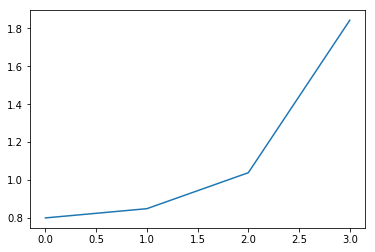

In [5]:
plt.plot(tout[0, :], xout[0, :, 0])

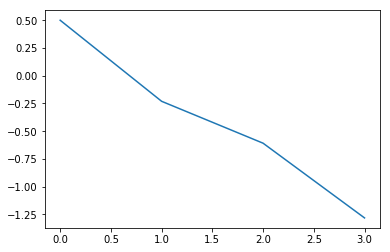

In [6]:
plt.plot(tout[0, :], xout[0, :, 1])

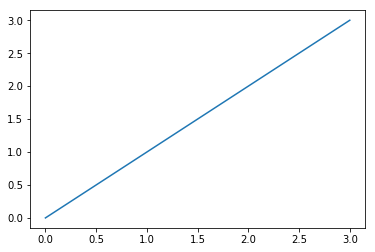

In [7]:
plt.plot(tout[0, :], xout[0, :, 2])

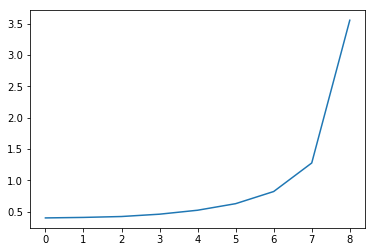

In [8]:
plt.plot(tout[1, :], xout[1, :, 0])

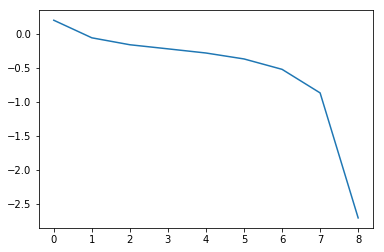

In [9]:
plt.plot(tout[1, :], xout[1, :, 1])

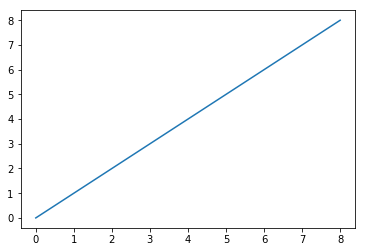

In [10]:
plt.plot(tout[1, :], xout[1, :, 2])

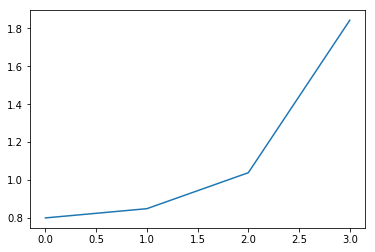

In [11]:
plt.plot(tout[0, :], xout[0, :, 0])

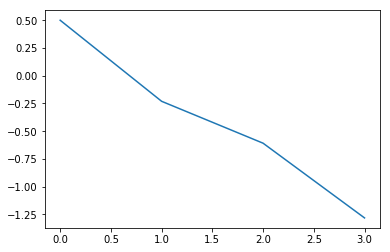

In [12]:
plt.plot(tout[0, :], xout[0, :, 1])

In [13]:
x = np.array([[1., 2., 3.], [1., 2., 3.]])
nb.hermite_basis(x)
nb.polynomial_basis(x)

NameError: name 'nb' is not defined